<a href="https://colab.research.google.com/github/Aisha-Hagar/CarRetailApp/blob/main/DataPreparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import random
from shutil import copyfile
from sklearn.model_selection import train_test_split

#**Data Exploration**

In [ ]:
data_info = pd.read_csv('/content/drive/MyDrive/Projects/car_body_type_data/stanford_cars_type.csv')

In [ ]:
data_info

,Unnamed: 0,file_name,car_code,car_name,brand,car_type,new_filename
0,0,00001.jpg,14,Audi TTS Coupe 2012,Audi,Coupe,00001_Audi TTS Coupe 2012.jpg
1,1,00002.jpg,3,Acura TL Sedan 2012,Acura,Sedan,00002_Acura TL Sedan 2012.jpg
2,2,00003.jpg,91,Dodge Dakota Club Cab 2007,Dodge,Cab,00003_Dodge Dakota Club Cab 2007.jpg
3,3,00004.jpg,134,Hyundai Sonata Hybrid Sedan 2012,Hyundai,Sedan,00004_Hyundai Sonata Hybrid Sedan 2012.jpg
4,4,00005.jpg,106,Ford F-450 Super Duty Crew Cab 2012,Ford,Cab,00005_Ford F-450 Super Duty Crew Cab 2012.jpg
...,...,...,...,...,...,...,...
8139,8139,08140.jpg,78,Chrysler Town and Country Minivan 2012,Chrysler,Minivan,08140_Chrysler Town and Country Minivan 2012.jpg
8140,8140,08141.jpg,196,smart fortwo Convertible 2012,smart,Convertible,08141_smart fortwo Convertible 2012.jpg
8141,8141,08142.jpg,163,Mercedes-Benz SL-Class Coupe 2009,Mercedes-Benz,Coupe,08142_Mercedes-Benz SL-Class Coupe 2009.jpg
8142,8142,08143.jpg,112,Ford GT Coupe 2006,Ford,Coupe,08143_Ford GT Coupe 2006.jpg


In [ ]:
data_info['car_type'].unique()

array(['Coupe', 'Sedan', 'Cab', 'Convertible', 'SUV', 'Minivan',
       'Hatchback', 'Other', 'Van', 'Wagon'], dtype=object)

In [ ]:
data_info['car_type'] = data_info['car_type'].apply(lambda x: 'SuperCab' if x == 'Other' else x)

In [ ]:
data_info['car_type'].unique()

array(['Coupe', 'Sedan', 'Cab', 'Convertible', 'SUV', 'Minivan',
       'Hatchback', 'SuperCab', 'Van', 'Wagon'], dtype=object)

In [ ]:
def plot_bar(x, y, xlabel, ylabel, title):
  plt.figure(figsize=(30, 10))
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
  plt.title(title)
  sns.barplot(x = x, y = y)
  plt.show()

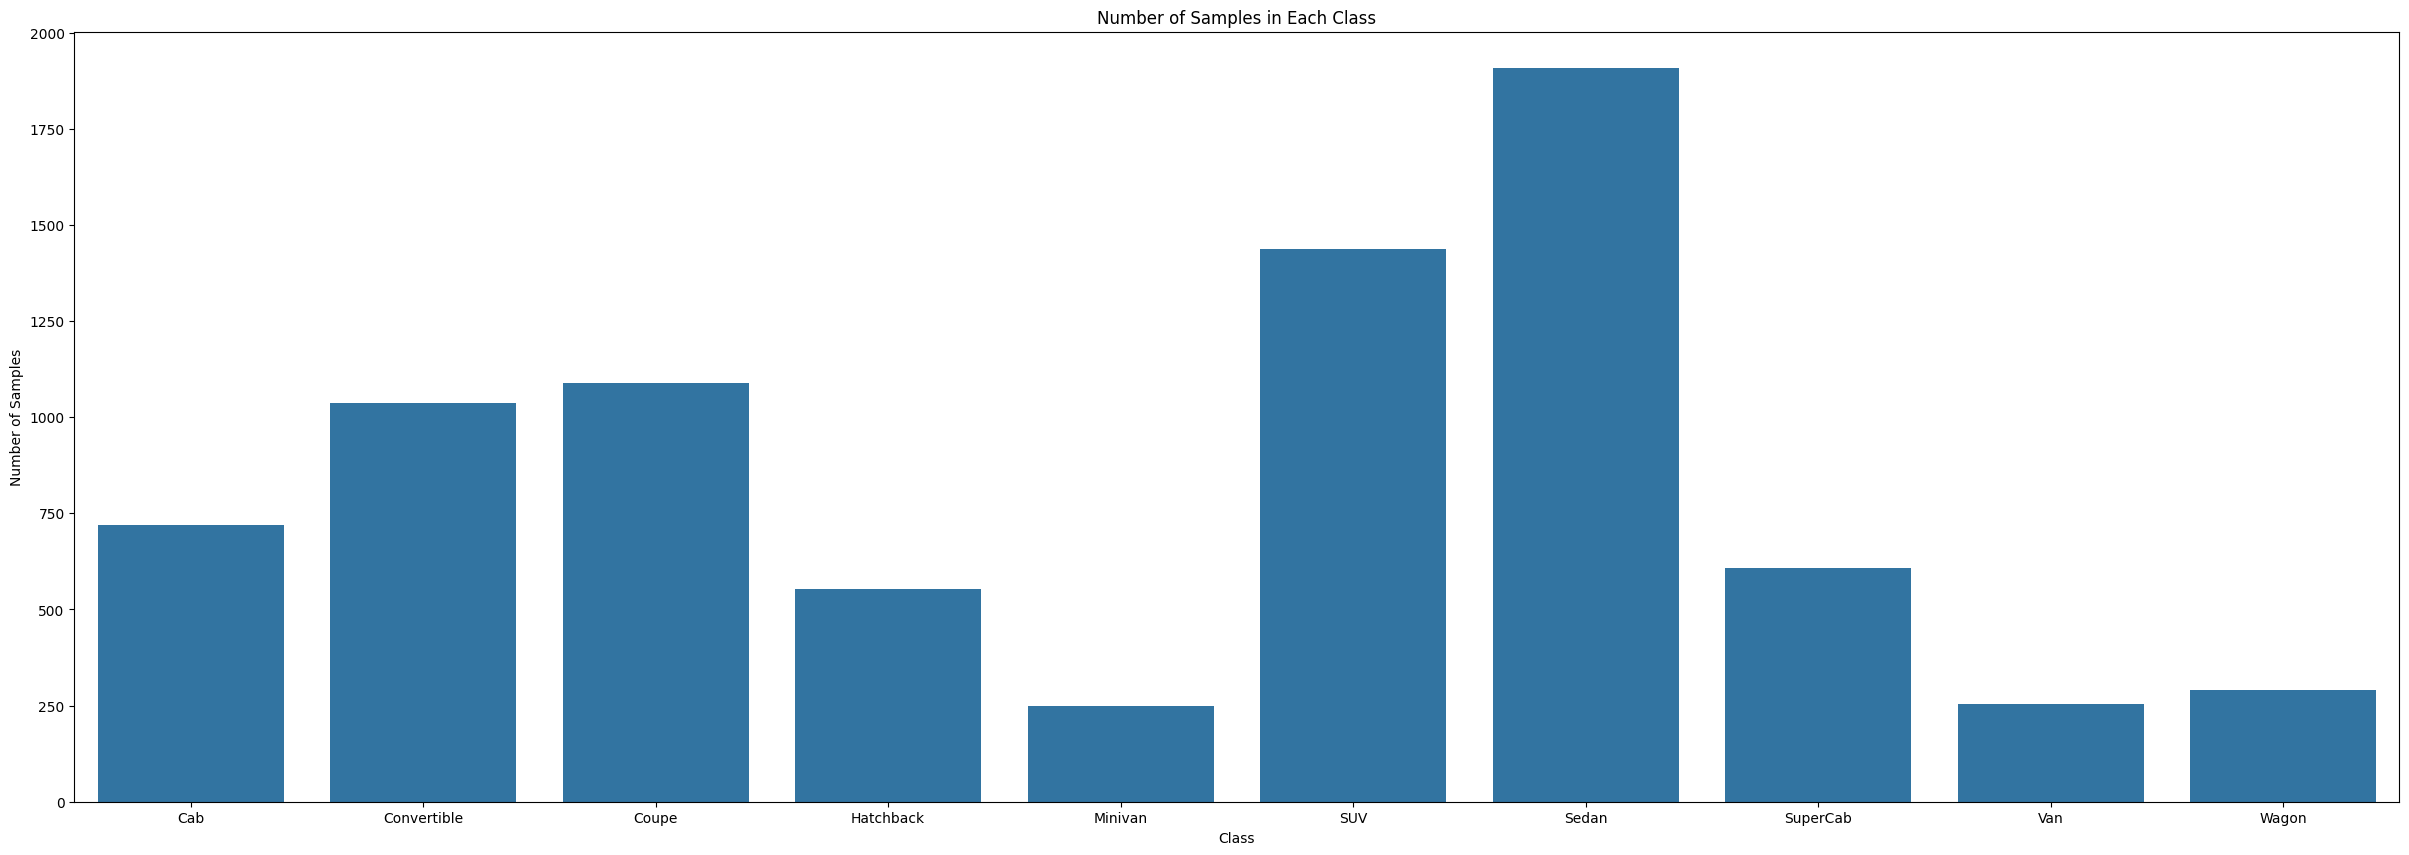

In [ ]:
#To have better understanding of the dataset, plot the number of images in each class
unique, counts = np.unique(data_info['car_type'], return_counts=True)
np.asarray((unique, counts)).T
plot_bar(unique, counts, 'Class', 'Number of Samples', 'Number of Samples in Each Class')

In [ ]:
X = data_info['new_filename']
y = data_info['car_type']

In [ ]:
X_train, X_testval, y_train, y_testval = train_test_split(X, y, train_size=0.8, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_testval, y_testval, train_size=0.9, random_state=42, stratify=y_testval)

In [ ]:
def create_folders(path):
  try:
    os.makedirs(path)
  except FileExistsError:
    pass

In [ ]:
create_folders('cars')
for i in unique:
  i=str(i)
  create_folders('cars/train/'+i)
  create_folders('cars/val/'+i)
  create_folders('cars/test/'+i)

In [ ]:
def copy_files(source_path, dest_path, filenames, labels):
  for (filename, label) in zip(filenames, labels):
    this_file = os.path.join(source_path, str(label),str(filename))
    destination = os.path.join(dest_path, label, filename)
    copyfile(this_file, destination)

In [ ]:
source = '/content/drive/MyDrive/Projects/car_body_type_data/stanford_cars_type'
train_path = 'cars/train/'
val_path = 'cars/val/'
test_path = 'cars/test/'
copy_files(source, train_path, X_train, y_train)
copy_files(source, val_path, X_val, y_val)
copy_files(source, test_path, X_test, y_test)

In [ ]:
!cp -av cars /content/drive/MyDrive/Projects/car_body_type_data

Streaming output truncated to the last 5000 lines.
'cars/train/SUV/05687_Land Rover Range Rover SUV 2012.jpg' -> '/content/drive/MyDrive/Projects/car_body_type_data/cars/train/SUV/05687_Land Rover Range Rover SUV 2012.jpg'
'cars/train/SUV/03041_Toyota Sequoia SUV 2012.jpg' -> '/content/drive/MyDrive/Projects/car_body_type_data/cars/train/SUV/03041_Toyota Sequoia SUV 2012.jpg'
'cars/train/SUV/01592_Jeep Wrangler SUV 2012.jpg' -> '/content/drive/MyDrive/Projects/car_body_type_data/cars/train/SUV/01592_Jeep Wrangler SUV 2012.jpg'
'cars/train/SUV/06471_Volvo XC90 SUV 2007.jpg' -> '/content/drive/MyDrive/Projects/car_body_type_data/cars/train/SUV/06471_Volvo XC90 SUV 2007.jpg'
'cars/train/SUV/05812_Hyundai Veracruz SUV 2012.jpg' -> '/content/drive/MyDrive/Projects/car_body_type_data/cars/train/SUV/05812_Hyundai Veracruz SUV 2012.jpg'
'cars/train/SUV/00718_Jeep Patriot SUV 2012.jpg' -> '/content/drive/MyDrive/Projects/car_body_type_data/cars/train/SUV/00718_Jeep Patriot SUV 2012.jpg'
'cars/t